In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_tree = Tree( fc.sr.NMSSM_MX_700_MY_400 )
bkg_tree = Tree( fc.sr.QCD_B_List + [fc.sr.TTJets] )
# signal_tree_v2 = Tree( "/uscms_data/d3/ekoenig/6BAnalysis/CMSSW_10_2_18/src/sixB/analysis/sixBanalysis/output-tree_NMSSM.root" )

In [28]:
bkg_tree.scales

[0.004356472668672352,
 0.0014842304533011267,
 0.00016081068483722865,
 0.00035995328498345306,
 3.502328248031866e-05,
 2.5991193736401787e-06,
 1.6098775028213962e-06,
 0.005953344116507744,
 0.0017713834523769324,
 0.0003711994118696258,
 0.00012126836834401641,
 7.075716825921494e-05,
 2.6609576319236707e-05,
 1.0163485936450367e-05,
 2.5486523691117353e-06]

In [20]:
import numpy as np

In [29]:
np.around(bkg_tree.scales,10)

array([4.3564727e-03, 1.4842305e-03, 1.6081070e-04, 3.5995330e-04,
       3.5023300e-05, 2.5991000e-06, 1.6099000e-06, 5.9533441e-03,
       1.7713835e-03, 3.7119940e-04, 1.2126840e-04, 7.0757200e-05,
       2.6609600e-05, 1.0163500e-05, 2.5487000e-06])

In [32]:
bkg_tree.cutflow[0][10]
total = 0
for nevents in bkg_tree.cutflow:
    print(nevents[10])
    total += nevents[10]
total

9.0
914.0
5634.0
1032.0
2902.0
4218.0
1239.0
1.0
198.0
1007.0
1791.0
1003.0
405.0
286.0
411665.0


432304.0

In [31]:
bkg_tree.cutflow

[<Array [1.85e+07, 794, 657, ... 115, 49, 9] type='11 * float64'>,
 <Array [1.12e+07, 4.02e+04, ... 3.39e+03, 914] type='11 * float64'>,
 <Array [9.25e+06, 2.04e+05, ... 5.63e+03] type='11 * float64'>,
 <Array [8.24e+05, 3.14e+04, ... 1.03e+03] type='11 * float64'>,
 <Array [1.33e+06, 7.5e+04, ... 2.9e+03] type='11 * float64'>,
 <Array [1.43e+06, 9.58e+04, ... 4.22e+03] type='11 * float64'>,
 <Array [4.01e+05, 2.46e+04, ... 1.24e+03] type='11 * float64'>,
 <Array [1.88e+07, 336, 306, 257, ... 22, 5, 1] type='11 * float64'>,
 <Array [1.58e+07, 1.75e+04, ... 1.12e+03, 198] type='11 * float64'>,
 <Array [8.29e+06, 6.35e+04, ... 1.01e+03] type='11 * float64'>,
 <Array [5.95e+06, 9.05e+04, ... 1.79e+03] type='11 * float64'>,
 <Array [1.95e+06, 4.91e+04, ... 4.9e+03, 1e+03] type='11 * float64'>,
 <Array [5.11e+05, 1.7e+04, ... 1.78e+03, 405] type='11 * float64'>,
 <Array [2.87e+05, 9.30e+03, ... 1.20e+03, 286] type='11 * float64'>,
 <Array [3.26e+08, 1.2e+07, ... 4.12e+05] type='11 * float64

In [12]:
bkg_tree.cutflow[0].to_numpy()

array([1.8462184e+07, 7.9400000e+02, 6.5700000e+02, 5.0600000e+02,
       5.0300000e+02, 2.0900000e+02, 2.0900000e+02, 1.6300000e+02,
       1.1500000e+02, 4.9000000e+01, 9.0000000e+00])

In [2]:
trees = [signal_tree,bkg_tree]

NameError: name 'signal_tree' is not defined

In [4]:
def calc_n_higgs(tree):
    n_t6_higgs = ak.sum( tree["t6_higgs_signalId"] != -1,axis=-1 )
    n_nn_higgs = ak.sum( tree["nn_higgs_signalId"] != -1,axis=-1 )
    tree.extend( nfound_t6_h = n_t6_higgs,nfound_nn_h = n_nn_higgs )
for tree in (signal_tree,bkg_tree): calc_n_higgs(tree)

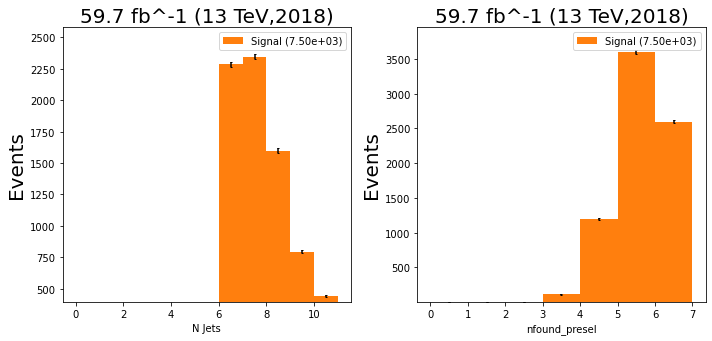

In [5]:
study.quick([signal_tree],varlist=["n_jet","nfound_presel"],binlist=(range(12),range(8)))

In [6]:
labels = dict(labels=["Top 6 Jets","NN 6 Jets"])
colors = dict(s_colors=['r','g'])
attrs = dict(**labels,**colors)

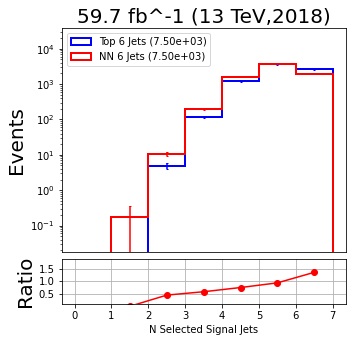

In [26]:
study.overlay(signal_tree,varlist=["nfound_presel","nfound_sixb"],labels=["Top 6 Jets","NN 6 Jets"],ratio=1,s_colors=["b","r"],xlabels=["N Selected Signal Jets"],binlist=[range(8)]*2,log=1)

In [16]:
study = Study(tree,labels=["Top 6 Jets","NN 6 Jets"])

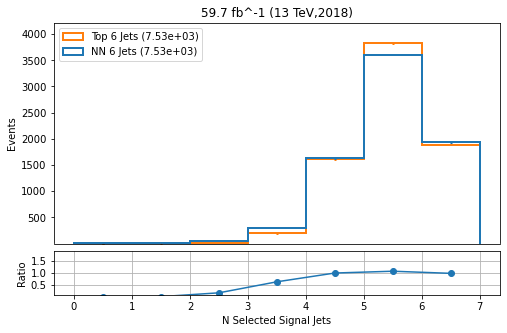

In [46]:
pairing_6j_method_efficiency(signal_tree,ratio=1)

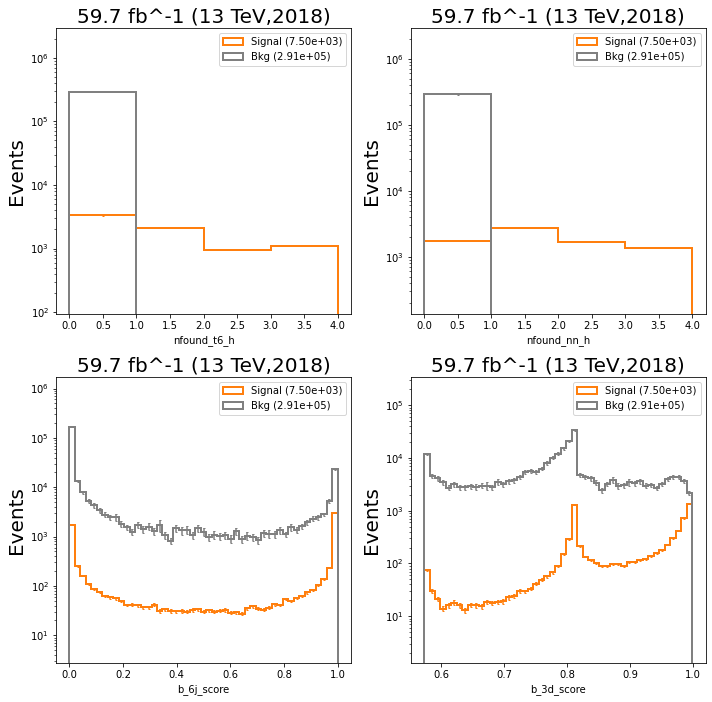

In [31]:
study.quick([signal_tree,bkg_tree],varlist=["nfound_t6_h","nfound_nn_h","b_6j_score","b_3d_score"],log=1, binlist=[range(5), range(5)])

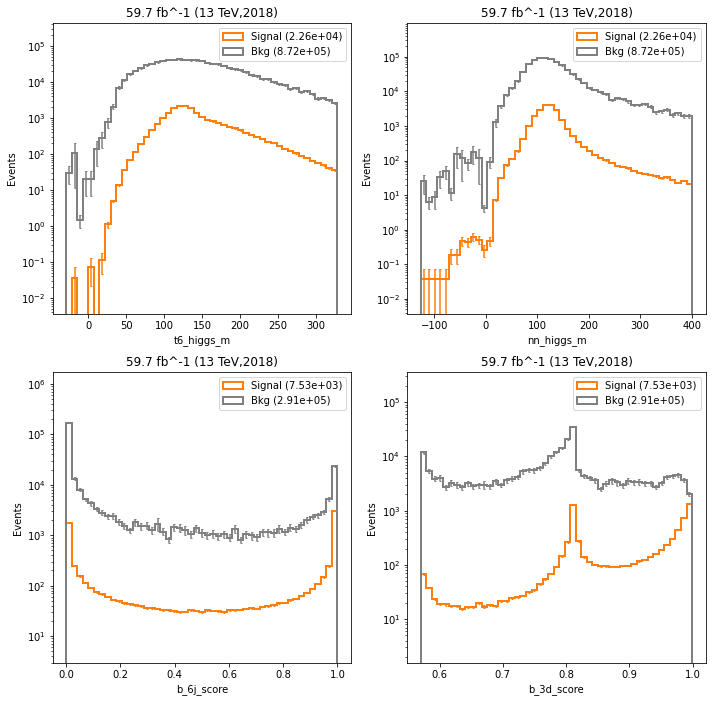

In [34]:
study.quick([signal_tree,bkg_tree],varlist=["t6_higgs_m","nn_higgs_m","b_6j_score","b_3d_score"],log=1)

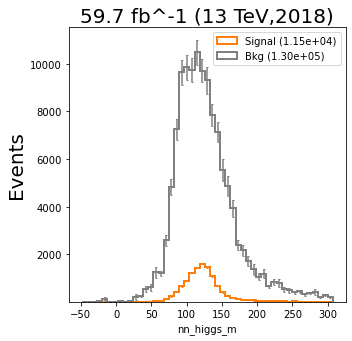

In [27]:
study.quick([signal_tree,bkg_tree],varlist=["nn_higgs_m"],masks=[ tree["b_6j_score"]>0.8 for tree in (signal_tree,bkg_tree)])

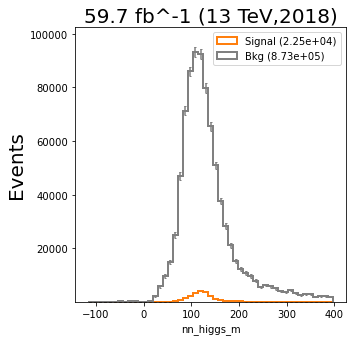

In [28]:
study.quick([signal_tree,bkg_tree],varlist=["nn_higgs_m"],masks=[ tree["b_6j_score"]>0 for tree in (signal_tree,bkg_tree)])

In [53]:
# study.quick([signal_tree,signal_tree_v2],varlist=["nfound_nn_h"],labels=["2j","3d"],s_colors=["blue","red"],binlist=[range(5)],density=1)

TypeError: type object got multiple values for keyword argument 's_colors'